# Week 11 - Development of Ensemble Model
Prince Samuvel S RA1811027010099

## Aim 
To predict the risk of heart attack in the given set of data using eXtreem Gradient Boosting Model from XGB library in python. **This is a binary outcome.**

Positive (+) = 1, patient is at risk Negative (-) = 0, patient is not at risk

## Algorithm of XGBoost
XGBoost falls under the category of **Boosting techniques** in Ensemble Learning. 

XGBoost or extreme gradient boosting is one of the well-known gradient boosting techniques(ensemble) having enhanced performance. Boosting is an ensemble technique where new models are added to correct the errors made by existing models. Models are added sequentially until no further improvements can be made. 

Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.

## Understanding the dataset avaliable

We have 13 features to train our model

1) age (#)

2) sex : 1 = Male, 0 = Female (Binary)

3) (cp) chest pain [type (4 values, Ordinal)]: 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic

4) (trestbps) resting blood pressure (#)

5) (chol) serum cholestoral in mg/dl (#)

6) (fbs) fasting blood sugar > 120 mg/dl (Binary) [1 = true; 0 = false]

7) (restecg) resting electrocardiographic results [values 0,1,2]

8) (thalach) maximum heart rate achieved (#)

9) (exang) exercise induced angina (Binary) [1 = yes; 0 = no]

10) (oldpeak) = ST depression induced by exercise relative to rest (#)

11) (slope) of the peak exercise ST segment (Ordinal) [ 1: upsloping, 2: flat , 3: downsloping]

12) (ca) number of major vessels (0-3, Ordinal) colored by fluoroscopy

13) (thal) maximum heart rate achieved (Ordinal) [3 = normal; 6 = fixed defect; 7 = reversable defect]

In [1]:
# Importing the necessary libraries for the project

import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report #Metrics
from sklearn.model_selection import train_test_split #Train_Test_split
from sklearn.preprocessing import StandardScaler #Preprocessing Data

# Exploring the Dataset 

In [2]:
#reading the given dataset into data variable
data=pd.read_csv('data.csv')

#Renaming num as target
data.rename(columns={'num       ': 'target'}, inplace=True) 

#printing the first 10 rows of the data
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
5,32,0,2,105,198,0,0,165,0,0.0,?,?,?,0
6,32,1,2,110,225,0,0,184,0,0.0,?,?,?,0
7,32,1,2,125,254,0,0,155,0,0.0,?,?,?,0
8,33,1,3,120,298,0,0,185,0,0.0,?,?,?,0
9,34,0,2,130,161,0,0,190,0,0.0,?,?,?,0


In [3]:
#printing the columns and their types
data.dtypes

age           int64
sex           int64
cp            int64
trestbps     object
chol         object
fbs          object
restecg      object
thalach      object
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

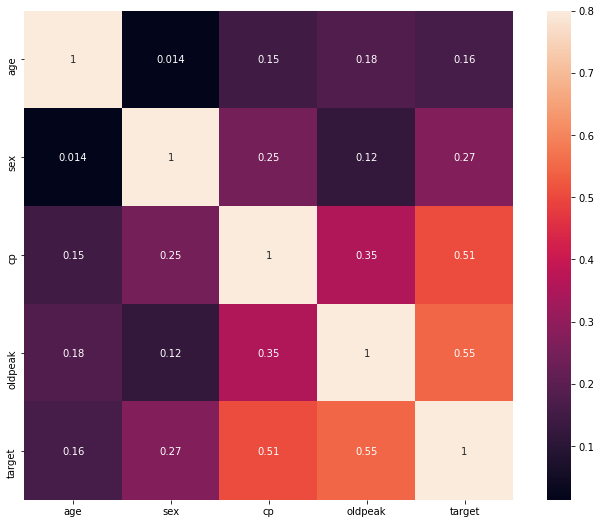

In [4]:
#Vizualizing the Data

import matplotlib.pyplot as plt
import seaborn as sns

corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

#### **OldPeak**(ST depression induced by exercise relative to rest) and **CP** ( Chest Pain Type ) have the most correlation with **target** ( diagnosis of heart disease)

# Preprocessing the Data

In [5]:
#Replacing the empty data with zeros
data=data.replace('?',None)
data=data.replace('?',0)

#printing the processed data
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,28,1,2,130,132,0,2,185,0,0.0,0,0,0,0
1,29,1,2,120,243,0,0,160,0,0.0,0,0,0,0
2,29,1,2,140,243,0,0,170,0,0.0,0,0,0,0
3,30,0,1,170,237,0,1,170,0,0.0,0,0,6,0
4,31,0,2,100,219,0,1,150,0,0.0,0,0,6,0


In [6]:
# Getting dummies for ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'] using pd.get_dummies
data = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'])

Scaling the other features using standard scaler.

In [7]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

In [8]:
data.drop(['ca'],axis=1,inplace=True)

#### Final Preprocessed Data

In [9]:
data.head(10)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_1,cp_2,...,exang_0,exang_1,slope_0,slope_1,slope_2,slope_3,thal_0,thal_3,thal_6,thal_7
0,-2.542347,-0.148467,-1.681029,1.951999,-0.646074,0,0,1,0,1,...,1,0,1,0,0,0,1,0,0,0
1,-2.414117,-0.717561,-0.117167,0.889244,-0.646074,0,0,1,0,1,...,1,0,1,0,0,0,1,0,0,0
2,-2.414117,0.420626,-0.117167,1.314346,-0.646074,0,0,1,0,1,...,1,0,1,0,0,0,1,0,0,0
3,-2.285888,2.127905,-0.201700,1.314346,-0.646074,0,1,0,1,0,...,1,0,1,0,0,0,0,0,1,0
4,-2.157658,-1.855747,-0.455300,0.464142,-0.646074,0,1,0,0,1,...,1,0,1,0,0,0,0,0,1,0
5,-2.029429,-1.571200,-0.751165,1.101795,-0.646074,0,1,0,0,1,...,1,0,1,0,0,0,0,0,1,0
6,-2.029429,-1.286654,-0.370767,1.909489,-0.646074,0,0,1,0,1,...,1,0,1,0,0,0,0,0,1,0
7,-2.029429,-0.433014,0.037810,0.676693,-0.646074,0,0,1,0,1,...,1,0,1,0,0,0,0,0,1,0
8,-1.901199,-0.717561,0.657719,1.951999,-0.646074,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
9,-1.772970,-0.148467,-1.272453,2.164550,-0.646074,0,1,0,0,1,...,1,0,1,0,0,0,0,0,1,0


# Splitting data as Train and Test

In [10]:
y = data['target']
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [11]:
print(X_train.shape)
print(y_train.shape)

(235, 26)
(235,)


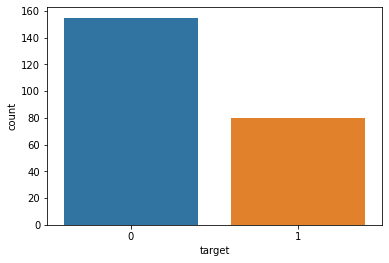

In [12]:
#Plotting the Target (Heart Disease)
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.show()

 ## XGB Classifier

In [13]:
#Importing the xgboost classifier
from xgboost import XGBClassifier

In [14]:
#creating the model
xgbmodel = XGBClassifier(use_label_encoder=False)

In [15]:
#training the model
xgbmodel.fit(X_train, y_train)

[23:37:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [19]:
y_pred = xgbmodel.predict(X_test)
print(y_pred)

[0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0
 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1]


In [17]:
xgb_acc_score = accuracy_score(y_test, y_pred)
xgb_conf_matrix = confusion_matrix(y_test, y_pred)
print("confussion matrix")
print(xgb_conf_matrix)
print(classification_report(y_test, y_pred))
print("\n")
print("Accuracy of Random Forest Classifier: %.0f%% "%(xgb_acc_score*100))

confussion matrix
[[31  2]
 [ 1 25]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.93      0.96      0.94        26

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59



Accuracy of Random Forest Classifier: 95% 


We can see that the accuracy of eXtreme Gradient Boosting is pretty high at 95%. 

From the confusion matrix we can see that the precision of 1 ( Risk of Heart Disease ) is 0.93 which needs to be high for this model to correctly perform 

# Conclusion
The eXtreme Gradient Boosting model has been successfully studied and implemented to predict the heart risk of a person